In [1]:
# The code was removed by Watson Studio for sharing.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 40, 20

In [3]:
%config IPCompleter.greedy=True
!pip install jupyter_contrib_nbextensions

Requirement not upgraded as not directly required: jupyter_contrib_nbextensions in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages
Requirement not upgraded as not directly required: nbconvert>=4.2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from jupyter_contrib_nbextensions)
Requirement not upgraded as not directly required: pyyaml in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from jupyter_contrib_nbextensions)
Requirement not upgraded as not directly required: lxml in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from jupyter_contrib_nbextensions)
Requirement not upgraded as not directly required: notebook>=4.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from jupyter_contrib_nbextensions)
Requirement not upgraded as not directly required: tornado in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from jupyter_contrib_nbextensions)
Requirement not upgraded as not directly required: ipython-genutils in /opt/

In [4]:
# The code was removed by Watson Studio for sharing.

,Quarter,CORBLACBS,DRBLACBS,Viol_r,Viol
0,34700,0.17,2.12,-0.313683,0.039819
1,34790,0.12,2.10,-0.148573,0.057362
2,34881,0.33,2.07,-0.111225,0.061574
3,34973,0.27,2.07,0.004051,0.079086
4,35065,0.31,2.06,-0.165298,0.052744


In [5]:
print('\n Data Types:')
print(df_data_1.dtypes)


 Data Types:
Quarter        int64
CORBLACBS    float64
DRBLACBS     float64
Viol_r       float64
Viol         float64
dtype: object


In [6]:

import xlrd
df_data_1['Quarter'] = df_data_1['Quarter'].apply(lambda s: xlrd.xldate.xldate_as_datetime(s, 0))

df_data_1.head()

,Quarter,CORBLACBS,DRBLACBS,Viol_r,Viol
0,1995-01-01,0.17,2.12,-0.313683,0.039819
1,1995-04-01,0.12,2.10,-0.148573,0.057362
2,1995-07-01,0.33,2.07,-0.111225,0.061574
3,1995-10-01,0.27,2.07,0.004051,0.079086
4,1996-01-01,0.31,2.06,-0.165298,0.052744


In [7]:
data = df_data_1.set_index('Quarter')

In [8]:
data.index

DatetimeIndex(['1995-01-01', '1995-04-01', '1995-07-01', '1995-10-01',
               '1996-01-01', '1996-04-01', '1996-07-01', '1996-10-01',
               '1997-01-01', '1997-04-01', '1997-07-01', '1997-10-01',
               '1998-01-01', '1998-04-01', '1998-07-01', '1998-10-01',
               '1999-01-01', '1999-04-01', '1999-07-01', '1999-10-01',
               '2000-01-01', '2000-04-01', '2000-07-01', '2000-10-01',
               '2001-01-01', '2001-04-01', '2001-07-01', '2001-10-01',
               '2002-01-01', '2002-04-01', '2002-07-01', '2002-10-01',
               '2003-01-01', '2003-04-01', '2003-07-01', '2003-10-01',
               '2004-01-01', '2004-04-01', '2004-07-01', '2004-10-01',
               '2005-01-01', '2005-04-01', '2005-07-01', '2005-10-01',
               '2006-01-01', '2006-04-01', '2006-07-01', '2006-10-01',
               '2007-01-01', '2007-04-01', '2007-07-01', '2007-10-01',
               '2008-01-01', '2008-04-01', '2008-07-01', '2008-10-01',
      

In [9]:
ts = data['Viol'] 
ts.head(10)

Quarter
1995-01-01    0.039819
1995-04-01    0.057362
1995-07-01    0.061574
1995-10-01    0.079086
1996-01-01    0.052744
1996-04-01    0.045494
1996-07-01    0.045746
1996-10-01    0.069198
1997-01-01    0.043493
1997-04-01    0.041993
Name: Viol, dtype: float64

In [10]:
rcParams['figure.figsize'] = 40, 20

In [11]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [12]:
ts_log = np.log(ts)


In [13]:
ts_1 = data['Viol_r'] 
ts_1.head(10)

Quarter
1995-01-01   -0.313683
1995-04-01   -0.148573
1995-07-01   -0.111225
1995-10-01    0.004051
1996-01-01   -0.165298
1996-04-01   -0.222938
1996-07-01   -0.213965
1996-10-01   -0.027650
1997-01-01   -0.222748
1997-04-01   -0.231415
Name: Viol_r, dtype: float64

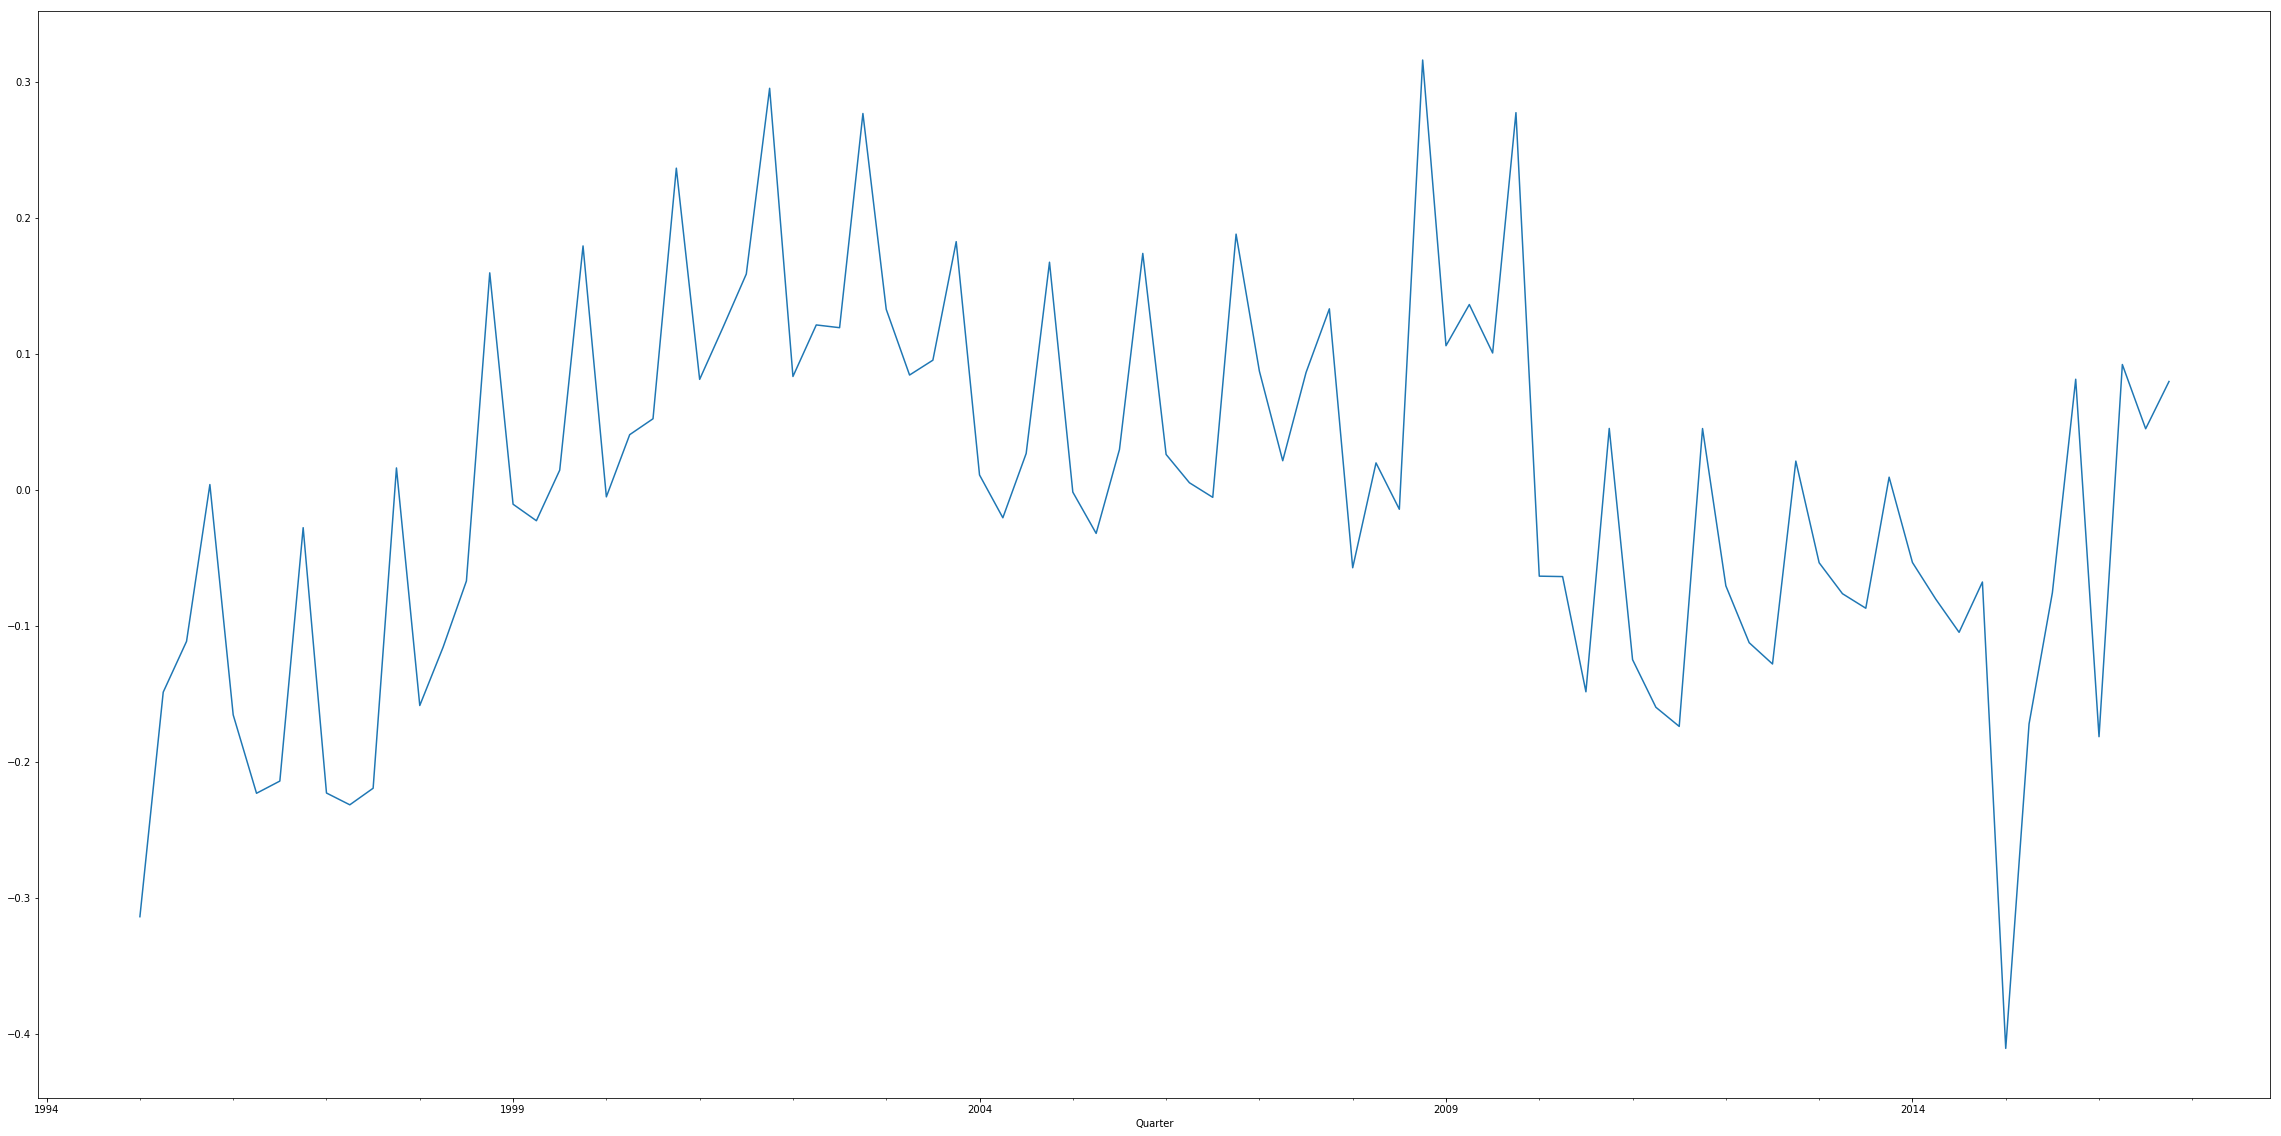

In [14]:
ts_1.plot()

In [15]:
ts_2 = data['CORBLACBS'] 
ts_2.head(10)

Quarter
1995-01-01    0.17
1995-04-01    0.12
1995-07-01    0.33
1995-10-01    0.27
1996-01-01    0.31
1996-04-01    0.28
1996-07-01    0.23
1996-10-01    0.20
1997-01-01    0.21
1997-04-01    0.23
Name: CORBLACBS, dtype: float64

In [16]:
ts_3 = data['DRBLACBS'] 
ts_3.head(10)

Quarter
1995-01-01    2.12
1995-04-01    2.10
1995-07-01    2.07
1995-10-01    2.07
1996-01-01    2.06
1996-04-01    2.06
1996-07-01    2.01
1996-10-01    1.95
1997-01-01    1.90
1997-04-01    1.81
Name: DRBLACBS, dtype: float64

In [17]:

body = client_e2bea2140e04443794485cdd2dcaf7b2.get_object(Bucket='staranalysis-donotdelete-pr-8ev5vemwyzco1a',Key='quater compare_2.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3 = df_data_3.dropna()
df_data_3.head()
print(df_data_3.shape)

(84, 5)


In [18]:
print('\n Data Types:')
print(df_data_3.dtypes)


 Data Types:
Quarter      float64
CORBLACBS    float64
DRBLACBS     float64
Viol_r       float64
Viol         float64
dtype: object


In [19]:
import xlrd

i = 0
for Quarter in df_data_3['Quarter']:
    df_data_3['Quarter'][i] = int(Quarter)
    i = i+1


df_data_3['Quarter'] = df_data_3['Quarter'].apply(lambda s: xlrd.xldate.xldate_as_datetime(s, 0))

df_data_3.head()

,Quarter,CORBLACBS,DRBLACBS,Viol_r,Viol
0,1996-01-01,0.31,2.06,-0.897850,0.052744
1,1996-04-01,0.28,2.06,-0.772725,0.045494
2,1996-07-01,0.23,2.01,-0.345263,0.045746
3,1996-10-01,0.20,1.95,-0.646939,0.069198
4,1997-01-01,0.21,1.90,-0.251018,0.043493


In [20]:
data_3 = df_data_3.set_index('Quarter')

In [21]:
moving_avg = pd.rolling_mean(data_3['Viol_r'],4)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=False).mean()
  if __name__ == '__main__':


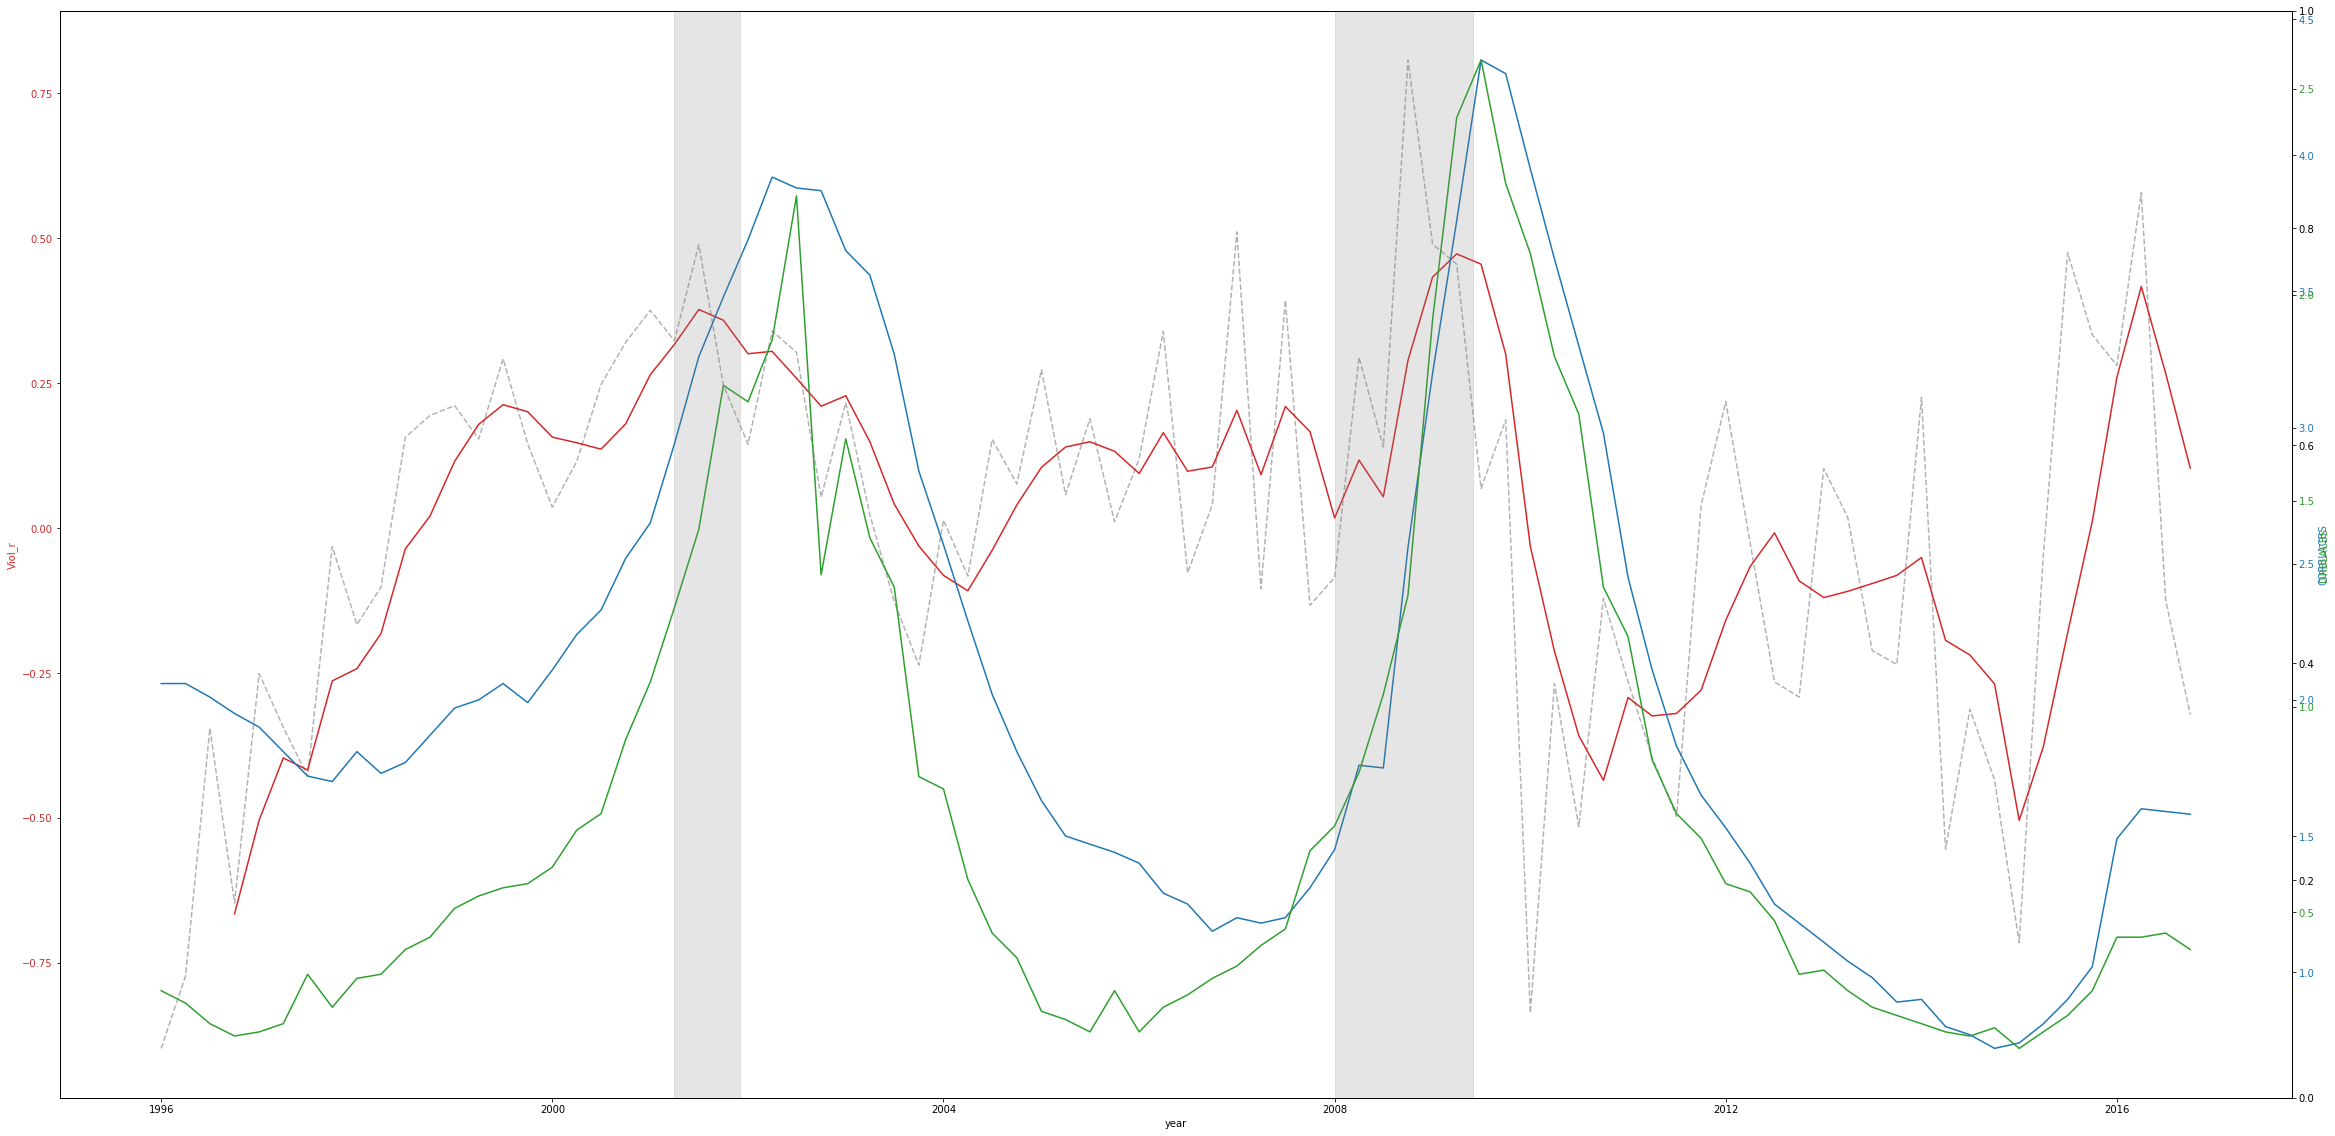

In [22]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('Viol_r', color=color)
ax1.plot(data_3['Viol_r'], color='black',alpha=0.3,linestyle='dashed')
ax1.plot(moving_avg, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('CORBLACBS', color=color)  # we already handled the x-label with ax1
ax2.plot(data_3['DRBLACBS'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax3.set_ylabel('DRBLACBS', color=color)  # we already handled the x-label with ax1
ax3.plot(data_3['CORBLACBS'], color=color)
ax3.tick_params(axis='y', labelcolor=color)

recs2k_bgn = pd.to_datetime('2001-04-01')
recs2k_end = pd.to_datetime('2001-12-01')

recs2k8_bgn = pd.to_datetime('2008-01-01')
recs2k8_end = pd.to_datetime('2009-06-01')

ax4 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax4.axvspan(recs2k_bgn, recs2k_end, color='grey', alpha=0.2)
ax4.axvspan(recs2k8_bgn, recs2k8_end,  color='grey', alpha=0.2)

plt.show()

In [23]:
project.save_data(data=data_3.to_csv(index=False),file_name='iris1.csv',overwrite=True)

{'asset_id': '1674b841-3575-4d12-95db-be51967b306b',
 'bucket_name': 'staranalysis-donotdelete-pr-8ev5vemwyzco1a',
 'file_name': 'iris1.csv',
 'message': 'File iris1.csv has been written successfully to the associated OS'}

In [24]:
project.save_data(data=moving_avg.to_csv(index=False),file_name='iris2.csv',overwrite=True)

{'asset_id': '309915d5-b45e-46d3-85b7-03917f1749e2',
 'bucket_name': 'staranalysis-donotdelete-pr-8ev5vemwyzco1a',
 'file_name': 'iris2.csv',
 'message': 'File iris2.csv has been written successfully to the associated OS'}

In [25]:
np.corrcoef(df_data_3['Viol_r'], df_data_3['CORBLACBS'])

array([[ 1.        ,  0.21937116],
       [ 0.21937116,  1.        ]])

In [26]:
fields = ['Quarter','CORBLACBS','Viol_r'] # mdct is datetime 
x = df_data_3[fields]
x.head(10)

,Quarter,CORBLACBS,Viol_r
0,1996-01-01,0.31,-0.897850
1,1996-04-01,0.28,-0.772725
2,1996-07-01,0.23,-0.345263
3,1996-10-01,0.20,-0.646939
4,1997-01-01,0.21,-0.251018
5,1997-04-01,0.23,-0.343774
6,1997-07-01,0.35,-0.428288
7,1997-10-01,0.27,-0.031822
8,1998-01-01,0.34,-0.166711
9,1998-04-01,0.35,-0.102014


In [27]:
def df_derived_by_shift(df,lag=0,NON_DER=[]):
    df = df.copy()
    if not lag:
        return df
    cols ={}
    for i in range(1,lag+1):
        for x in list(df.columns):
            if x not in NON_DER:
                if not x in cols:
                    cols[x] = ['{}_{}'.format(x, i)]
                else:
                    cols[x].append('{}_{}'.format(x, i))
    for k,v in cols.items():
        columns = v
        dfn = pd.DataFrame(data=None, columns=columns, index=df.index)    
        i = 1
        for c in columns:
            dfn[c] = df[k].shift(periods=i)
            i+=1
        df = pd.concat([df, dfn], axis=1, join_axes=[df.index])
    return df

In [28]:
NON_DER = ['Quarter',]
df_new = df_derived_by_shift(x, 10, NON_DER)

In [29]:
df_new.head(10)

,Quarter,CORBLACBS,Viol_r,CORBLACBS_1,CORBLACBS_2,CORBLACBS_3,CORBLACBS_4,CORBLACBS_5,CORBLACBS_6,CORBLACBS_7,...,Viol_r_1,Viol_r_2,Viol_r_3,Viol_r_4,Viol_r_5,Viol_r_6,Viol_r_7,Viol_r_8,Viol_r_9,Viol_r_10
0,1996-01-01,0.31,-0.897850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1996-04-01,0.28,-0.772725,0.31,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.897850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1996-07-01,0.23,-0.345263,0.28,0.31,NaN,NaN,NaN,NaN,NaN,...,-0.772725,-0.897850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1996-10-01,0.20,-0.646939,0.23,0.28,0.31,NaN,NaN,NaN,NaN,...,-0.345263,-0.772725,-0.897850,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1997-01-01,0.21,-0.251018,0.20,0.23,0.28,0.31,NaN,NaN,NaN,...,-0.646939,-0.345263,-0.772725,-0.897850,NaN,NaN,NaN,NaN,NaN,NaN
5,1997-04-01,0.23,-0.343774,0.21,0.20,0.23,0.28,0.31,NaN,NaN,...,-0.251018,-0.646939,-0.345263,-0.772725,-0.897850,NaN,NaN,NaN,NaN,NaN
6,1997-07-01,0.35,-0.428288,0.23,0.21,0.20,0.23,0.28,0.31,NaN,...,-0.343774,-0.251018,-0.646939,-0.345263,-0.772725,-0.897850,NaN,NaN,NaN,NaN
7,1997-10-01,0.27,-0.031822,0.35,0.23,0.21,0.20,0.23,0.28,0.31,...,-0.428288,-0.343774,-0.251018,-0.646939,-0.345263,-0.772725,-0.897850,NaN,NaN,NaN
8,1998-01-01,0.34,-0.166711,0.27,0.35,0.23,0.21,0.20,0.23,0.28,...,-0.031822,-0.428288,-0.343774,-0.251018,-0.646939,-0.345263,-0.772725,-0.897850,NaN,NaN
9,1998-04-01,0.35,-0.102014,0.34,0.27,0.35,0.23,0.21,0.20,0.23,...,-0.166711,-0.031822,-0.428288,-0.343774,-0.251018,-0.646939,-0.345263,-0.772725,-0.89785,NaN


In [30]:
df_new = df_new.dropna()

In [31]:
df_new.head(10)

,Quarter,CORBLACBS,Viol_r,CORBLACBS_1,CORBLACBS_2,CORBLACBS_3,CORBLACBS_4,CORBLACBS_5,CORBLACBS_6,CORBLACBS_7,...,Viol_r_1,Viol_r_2,Viol_r_3,Viol_r_4,Viol_r_5,Viol_r_6,Viol_r_7,Viol_r_8,Viol_r_9,Viol_r_10
10,1998-07-01,0.41,0.156642,0.35,0.34,0.27,0.35,0.23,0.21,0.20,...,-0.102014,-0.166711,-0.031822,-0.428288,-0.343774,-0.251018,-0.646939,-0.345263,-0.772725,-0.897850
11,1998-10-01,0.44,0.194166,0.41,0.35,0.34,0.27,0.35,0.23,0.21,...,0.156642,-0.102014,-0.166711,-0.031822,-0.428288,-0.343774,-0.251018,-0.646939,-0.345263,-0.772725
12,1999-01-01,0.51,0.211221,0.44,0.41,0.35,0.34,0.27,0.35,0.23,...,0.194166,0.156642,-0.102014,-0.166711,-0.031822,-0.428288,-0.343774,-0.251018,-0.646939,-0.345263
13,1999-04-01,0.54,0.153670,0.51,0.44,0.41,0.35,0.34,0.27,0.35,...,0.211221,0.194166,0.156642,-0.102014,-0.166711,-0.031822,-0.428288,-0.343774,-0.251018,-0.646939
14,1999-07-01,0.56,0.292031,0.54,0.51,0.44,0.41,0.35,0.34,0.27,...,0.153670,0.211221,0.194166,0.156642,-0.102014,-0.166711,-0.031822,-0.428288,-0.343774,-0.251018
15,1999-10-01,0.57,0.145434,0.56,0.54,0.51,0.44,0.41,0.35,0.34,...,0.292031,0.153670,0.211221,0.194166,0.156642,-0.102014,-0.166711,-0.031822,-0.428288,-0.343774
16,2000-01-01,0.61,0.036227,0.57,0.56,0.54,0.51,0.44,0.41,0.35,...,0.145434,0.292031,0.153670,0.211221,0.194166,0.156642,-0.102014,-0.166711,-0.031822,-0.428288
17,2000-04-01,0.70,0.114689,0.61,0.57,0.56,0.54,0.51,0.44,0.41,...,0.036227,0.145434,0.292031,0.153670,0.211221,0.194166,0.156642,-0.102014,-0.166711,-0.031822
18,2000-07-01,0.74,0.247775,0.70,0.61,0.57,0.56,0.54,0.51,0.44,...,0.114689,0.036227,0.145434,0.292031,0.153670,0.211221,0.194166,0.156642,-0.102014,-0.166711
19,2000-10-01,0.92,0.320386,0.74,0.70,0.61,0.57,0.56,0.54,0.51,...,0.247775,0.114689,0.036227,0.145434,0.292031,0.153670,0.211221,0.194166,0.156642,-0.102014


In [32]:
df_new.corr()

,CORBLACBS,Viol_r,CORBLACBS_1,CORBLACBS_2,CORBLACBS_3,CORBLACBS_4,CORBLACBS_5,CORBLACBS_6,CORBLACBS_7,CORBLACBS_8,...,Viol_r_1,Viol_r_2,Viol_r_3,Viol_r_4,Viol_r_5,Viol_r_6,Viol_r_7,Viol_r_8,Viol_r_9,Viol_r_10
CORBLACBS,1.000000,0.116030,0.945337,0.870259,0.751924,0.613153,0.458138,0.303827,0.150091,0.003589,...,0.253873,0.328728,0.434414,0.445849,0.446853,0.455455,0.434829,0.412754,0.381249,0.341774
Viol_r,0.116030,1.000000,-0.033515,-0.157514,-0.253484,-0.309721,-0.326724,-0.314979,-0.323900,-0.306024,...,0.448442,0.343001,0.180301,0.031853,-0.065831,0.021216,-0.039859,0.006583,0.048439,-0.043862
CORBLACBS_1,0.945337,-0.033515,1.000000,0.945500,0.870639,0.752479,0.613992,0.459137,0.304866,0.150495,...,0.111306,0.255485,0.353257,0.451048,0.464737,0.472868,0.460461,0.438167,0.412842,0.382258
CORBLACBS_2,0.870259,-0.157514,0.945500,1.000000,0.945653,0.871001,0.753348,0.615269,0.460707,0.306176,...,-0.038159,0.113808,0.276882,0.370300,0.468937,0.489402,0.477563,0.466594,0.438928,0.413445
CORBLACBS_3,0.751924,-0.253484,0.870639,0.945653,1.000000,0.945749,0.871773,0.754711,0.617134,0.462623,...,-0.162304,-0.034236,0.133101,0.297052,0.390170,0.494674,0.496080,0.484988,0.469391,0.441654
CORBLACBS_4,0.613153,-0.309721,0.752479,0.871001,0.945749,1.000000,0.945938,0.872307,0.755573,0.618118,...,-0.260043,-0.159386,-0.018183,0.152818,0.315563,0.414222,0.498076,0.502717,0.483437,0.466371
CORBLACBS_5,0.458138,-0.326724,0.613992,0.753348,0.871773,0.945938,1.000000,0.946110,0.872667,0.755951,...,-0.318721,-0.256608,-0.140141,0.009686,0.177890,0.345360,0.424977,0.501046,0.502957,0.483973
CORBLACBS_6,0.303827,-0.314979,0.459137,0.615269,0.754711,0.872307,0.946110,1.000000,0.946188,0.872711,...,-0.337415,-0.315795,-0.237046,-0.109071,0.037265,0.208952,0.359176,0.423623,0.500864,0.502751
CORBLACBS_7,0.150091,-0.323900,0.304866,0.460707,0.617134,0.755573,0.872667,0.946188,1.000000,0.946146,...,-0.326702,-0.334996,-0.296029,-0.203856,-0.079914,0.068577,0.227489,0.354338,0.425336,0.500769
CORBLACBS_8,0.003589,-0.306024,0.150495,0.306176,0.462623,0.618118,0.755951,0.872711,0.946146,1.000000,...,-0.337572,-0.325739,-0.314731,-0.262790,-0.174504,-0.049055,0.090101,0.216250,0.355784,0.426795


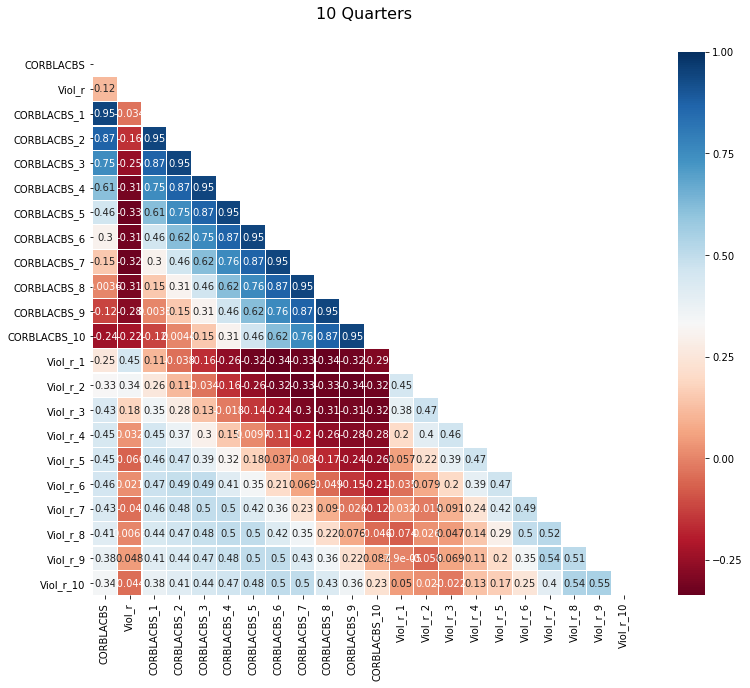

In [33]:
import seaborn as sns
colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))
plt.title(u'10 Quarters', y=1.05, size=16)

mask = np.zeros_like(df_new.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(df_new.corr(), mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [34]:
x['Viol_r'] = x['Viol_r'].shift(3)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [35]:
x = x.dropna()
x.head()

,Quarter,CORBLACBS,Viol_r
3,1996-10-01,0.20,-0.897850
4,1997-01-01,0.21,-0.772725
5,1997-04-01,0.23,-0.345263
6,1997-07-01,0.35,-0.646939
7,1997-10-01,0.27,-0.251018


In [36]:
x = x.dropna().set_index('Quarter')
x.head()

,CORBLACBS,Viol_r
Quarter,,
1996-10-01,0.20,-0.897850
1997-01-01,0.21,-0.772725
1997-04-01,0.23,-0.345263
1997-07-01,0.35,-0.646939
1997-10-01,0.27,-0.251018


In [37]:
moving_avg = pd.rolling_mean(x['Viol_r'],4)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=False).mean()
  if __name__ == '__main__':


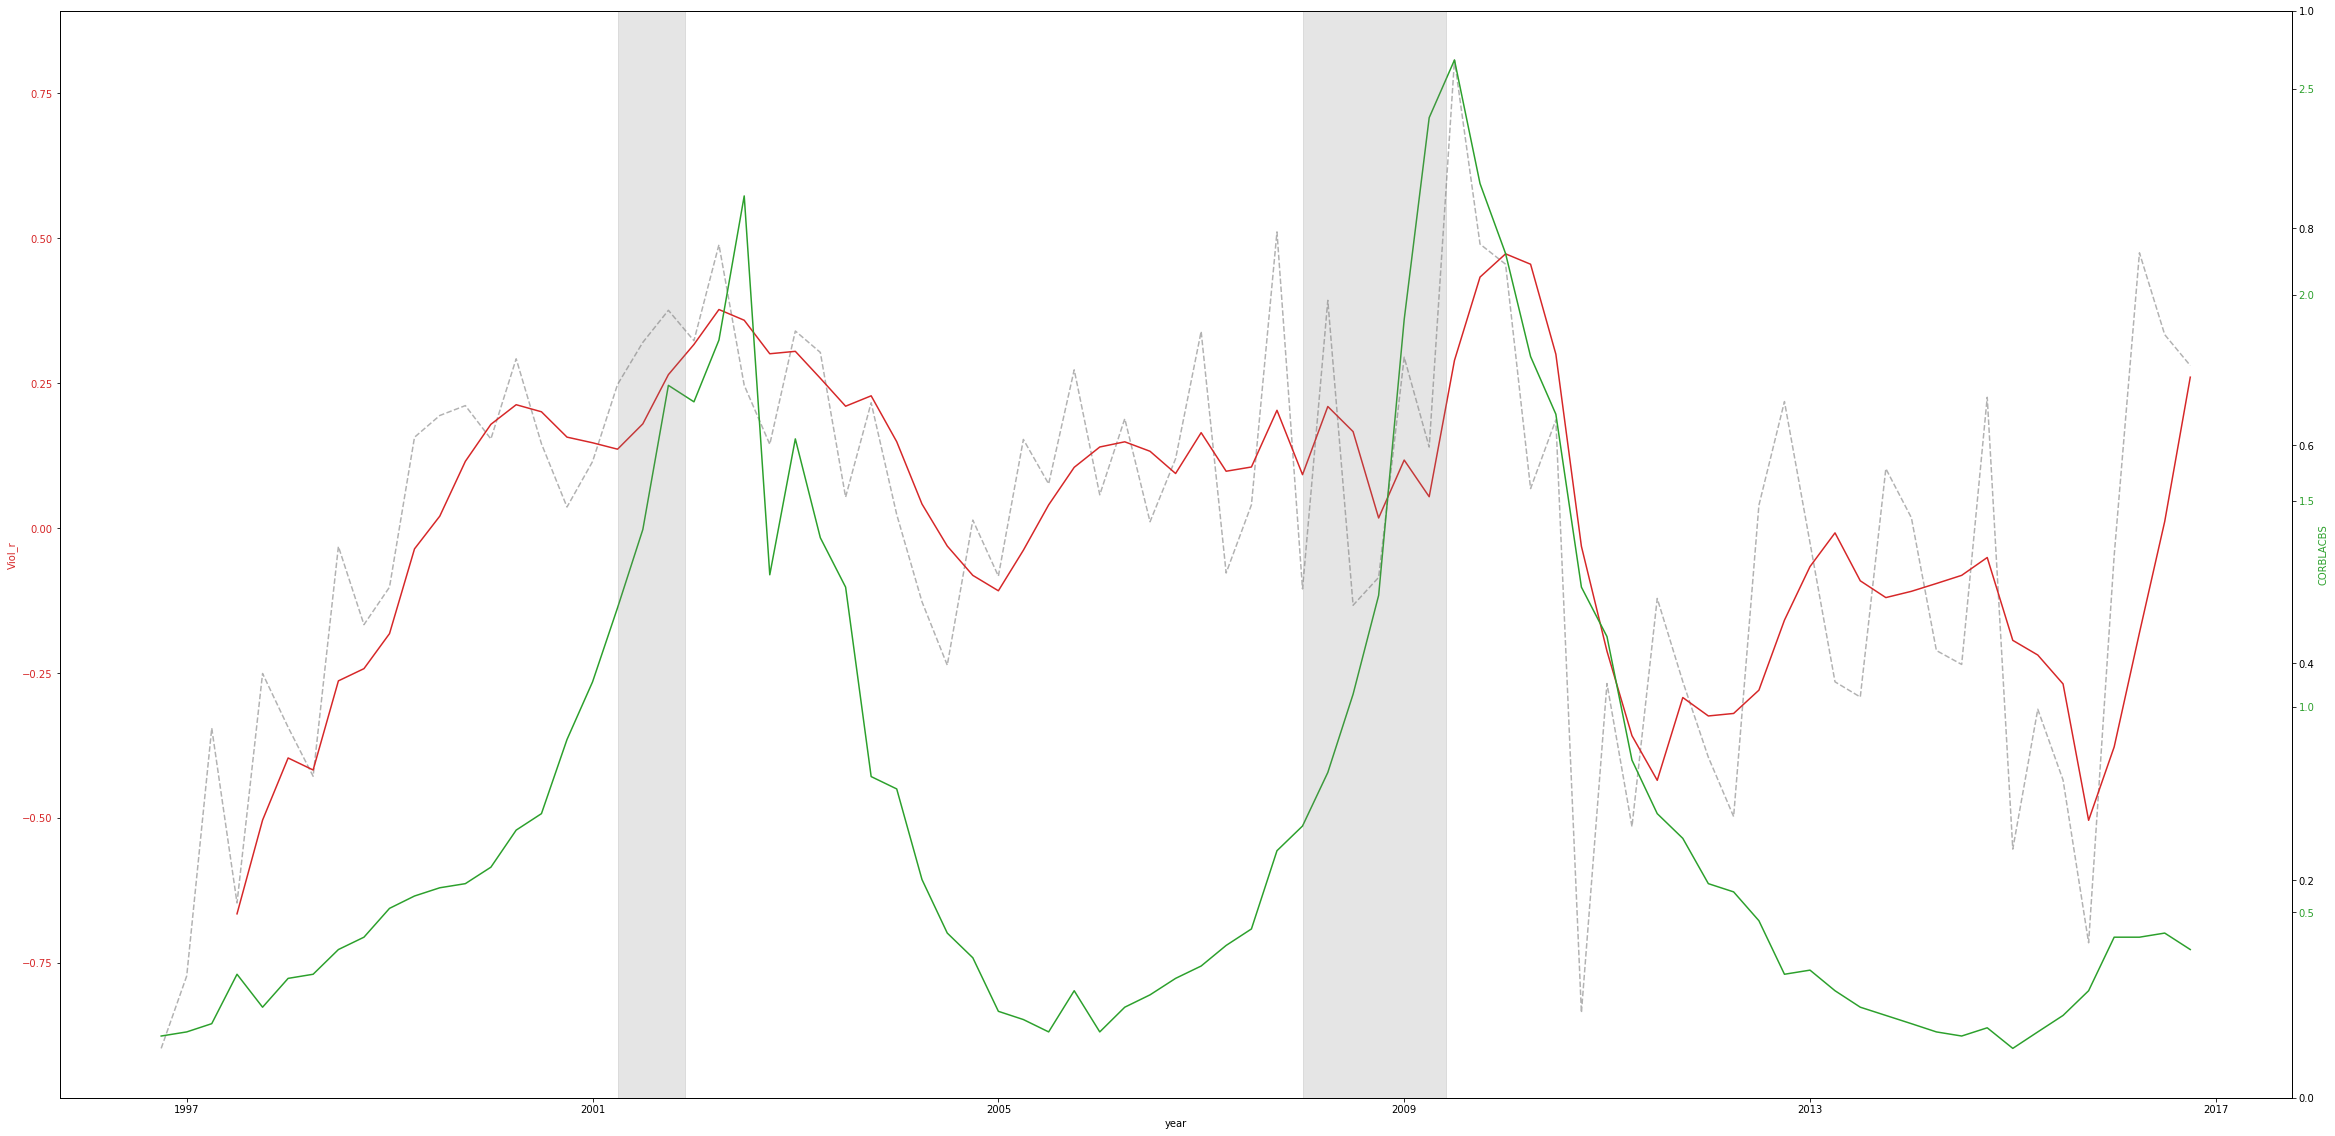

In [38]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('Viol_r', color=color)
ax1.plot(x['Viol_r'], color='black',alpha=0.3,linestyle='dashed')
ax1.plot(moving_avg, color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax3.set_ylabel('CORBLACBS', color=color)  # we already handled the x-label with ax1
ax3.plot(x['CORBLACBS'], color=color)
ax3.tick_params(axis='y', labelcolor=color)

recs2k_bgn = pd.to_datetime('2001-04-01')
recs2k_end = pd.to_datetime('2001-12-01')

recs2k8_bgn = pd.to_datetime('2008-01-01')
recs2k8_end = pd.to_datetime('2009-06-01')

ax4 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax4.axvspan(recs2k_bgn, recs2k_end, color='grey', alpha=0.2)
ax4.axvspan(recs2k8_bgn, recs2k8_end,  color='grey', alpha=0.2)

plt.show()

In [39]:
import statsmodels.api as sm

In [40]:
model1=sm.OLS(endog=data_3['CORBLACBS'],exog=data_3['Viol_r'])
results1=model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:              CORBLACBS   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.637
Date:                Sat, 18 Aug 2018   Prob (F-statistic):              0.204
Time:                        18:13:08   Log-Likelihood:                -115.87
No. Observations:                  84   AIC:                             233.7
Df Residuals:                      83   BIC:                             236.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Viol_r         0.4012      0.314      1.279      0.2

In [41]:
model1=sm.OLS(endog=x['CORBLACBS'],exog=x['Viol_r'])
results1=model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:              CORBLACBS   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     7.734
Date:                Sat, 18 Aug 2018   Prob (F-statistic):            0.00675
Time:                        18:13:08   Log-Likelihood:                -110.15
No. Observations:                  81   AIC:                             222.3
Df Residuals:                      80   BIC:                             224.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Viol_r         0.8765      0.315      2.781      0.0

In [42]:
np.corrcoef(x['CORBLACBS'],x['Viol_r'])

array([[ 1.       ,  0.4790603],
       [ 0.4790603,  1.       ]])

In [43]:

body = client_e2bea2140e04443794485cdd2dcaf7b2.get_object(Bucket='staranalysis-donotdelete-pr-8ev5vemwyzco1a',Key='Yield_curve.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_4 = pd.read_csv(body)
df_data_4.head()

,Quarter,yield_curve
0,35156,0.603281
1,35247,0.600000
2,35339,0.550484
3,35431,0.522333
4,35521,0.423750


In [44]:
i = 0
for Quarter in df_data_4['Quarter']:
    df_data_4['Quarter'][i] = int(Quarter)
    i = i+1


df_data_4['Quarter'] = df_data_4['Quarter'].apply(lambda s: xlrd.xldate.xldate_as_datetime(s, 0))

df_data_4.head()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Quarter,yield_curve
0,1996-04-01,0.603281
1,1996-07-01,0.600000
2,1996-10-01,0.550484
3,1997-01-01,0.522333
4,1997-04-01,0.423750


In [45]:
df_data_4 = df_data_4.set_index('Quarter')
df_data_4.head()

,yield_curve
Quarter,
1996-04-01,0.603281
1996-07-01,0.600000
1996-10-01,0.550484
1997-01-01,0.522333
1997-04-01,0.423750


In [46]:
x = pd.concat([x, df_data_4], axis=1, join_axes=[x.index])

In [47]:
x.head()

,CORBLACBS,Viol_r,yield_curve
Quarter,,,
1996-10-01,0.20,-0.897850,0.550484
1997-01-01,0.21,-0.772725,0.522333
1997-04-01,0.23,-0.345263,0.423750
1997-07-01,0.35,-0.646939,0.338438
1997-10-01,0.27,-0.251018,0.171774


In [48]:
x = x.drop('CORBLACBS',axis = 1)

In [49]:
NON_DER = ['Quarter',]
df_new = df_derived_by_shift(x, 10, NON_DER)

In [50]:
df_new

,Viol_r,yield_curve,Viol_r_1,Viol_r_2,Viol_r_3,Viol_r_4,Viol_r_5,Viol_r_6,Viol_r_7,Viol_r_8,...,yield_curve_1,yield_curve_2,yield_curve_3,yield_curve_4,yield_curve_5,yield_curve_6,yield_curve_7,yield_curve_8,yield_curve_9,yield_curve_10
Quarter,,,,,,,,,,,,,,,,,,,,,
1996-10-01,-0.897850,0.550484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-01-01,-0.772725,0.522333,-0.897850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.550484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-04-01,-0.345263,0.423750,-0.772725,-0.897850,NaN,NaN,NaN,NaN,NaN,NaN,...,0.522333,0.550484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-07-01,-0.646939,0.338438,-0.345263,-0.772725,-0.897850,NaN,NaN,NaN,NaN,NaN,...,0.423750,0.522333,0.550484,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-10-01,-0.251018,0.171774,-0.646939,-0.345263,-0.772725,-0.897850,NaN,NaN,NaN,NaN,...,0.338438,0.423750,0.522333,0.550484,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-01,-0.343774,0.141311,-0.251018,-0.646939,-0.345263,-0.772725,-0.897850,NaN,NaN,NaN,...,0.171774,0.338438,0.423750,0.522333,0.550484,NaN,NaN,NaN,NaN,NaN
1998-04-01,-0.428288,0.034921,-0.343774,-0.251018,-0.646939,-0.345263,-0.772725,-0.897850,NaN,NaN,...,0.141311,0.171774,0.338438,0.423750,0.522333,0.550484,NaN,NaN,NaN,NaN
1998-07-01,-0.031822,0.071250,-0.428288,-0.343774,-0.251018,-0.646939,-0.345263,-0.772725,-0.897850,NaN,...,0.034921,0.141311,0.171774,0.338438,0.423750,0.522333,0.550484,NaN,NaN,NaN
1998-10-01,-0.166711,0.285645,-0.031822,-0.428288,-0.343774,-0.251018,-0.646939,-0.345263,-0.772725,-0.897850,...,0.071250,0.034921,0.141311,0.171774,0.338438,0.423750,0.522333,0.550484,NaN,NaN


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=False).mean()
  if __name__ == '__main__':


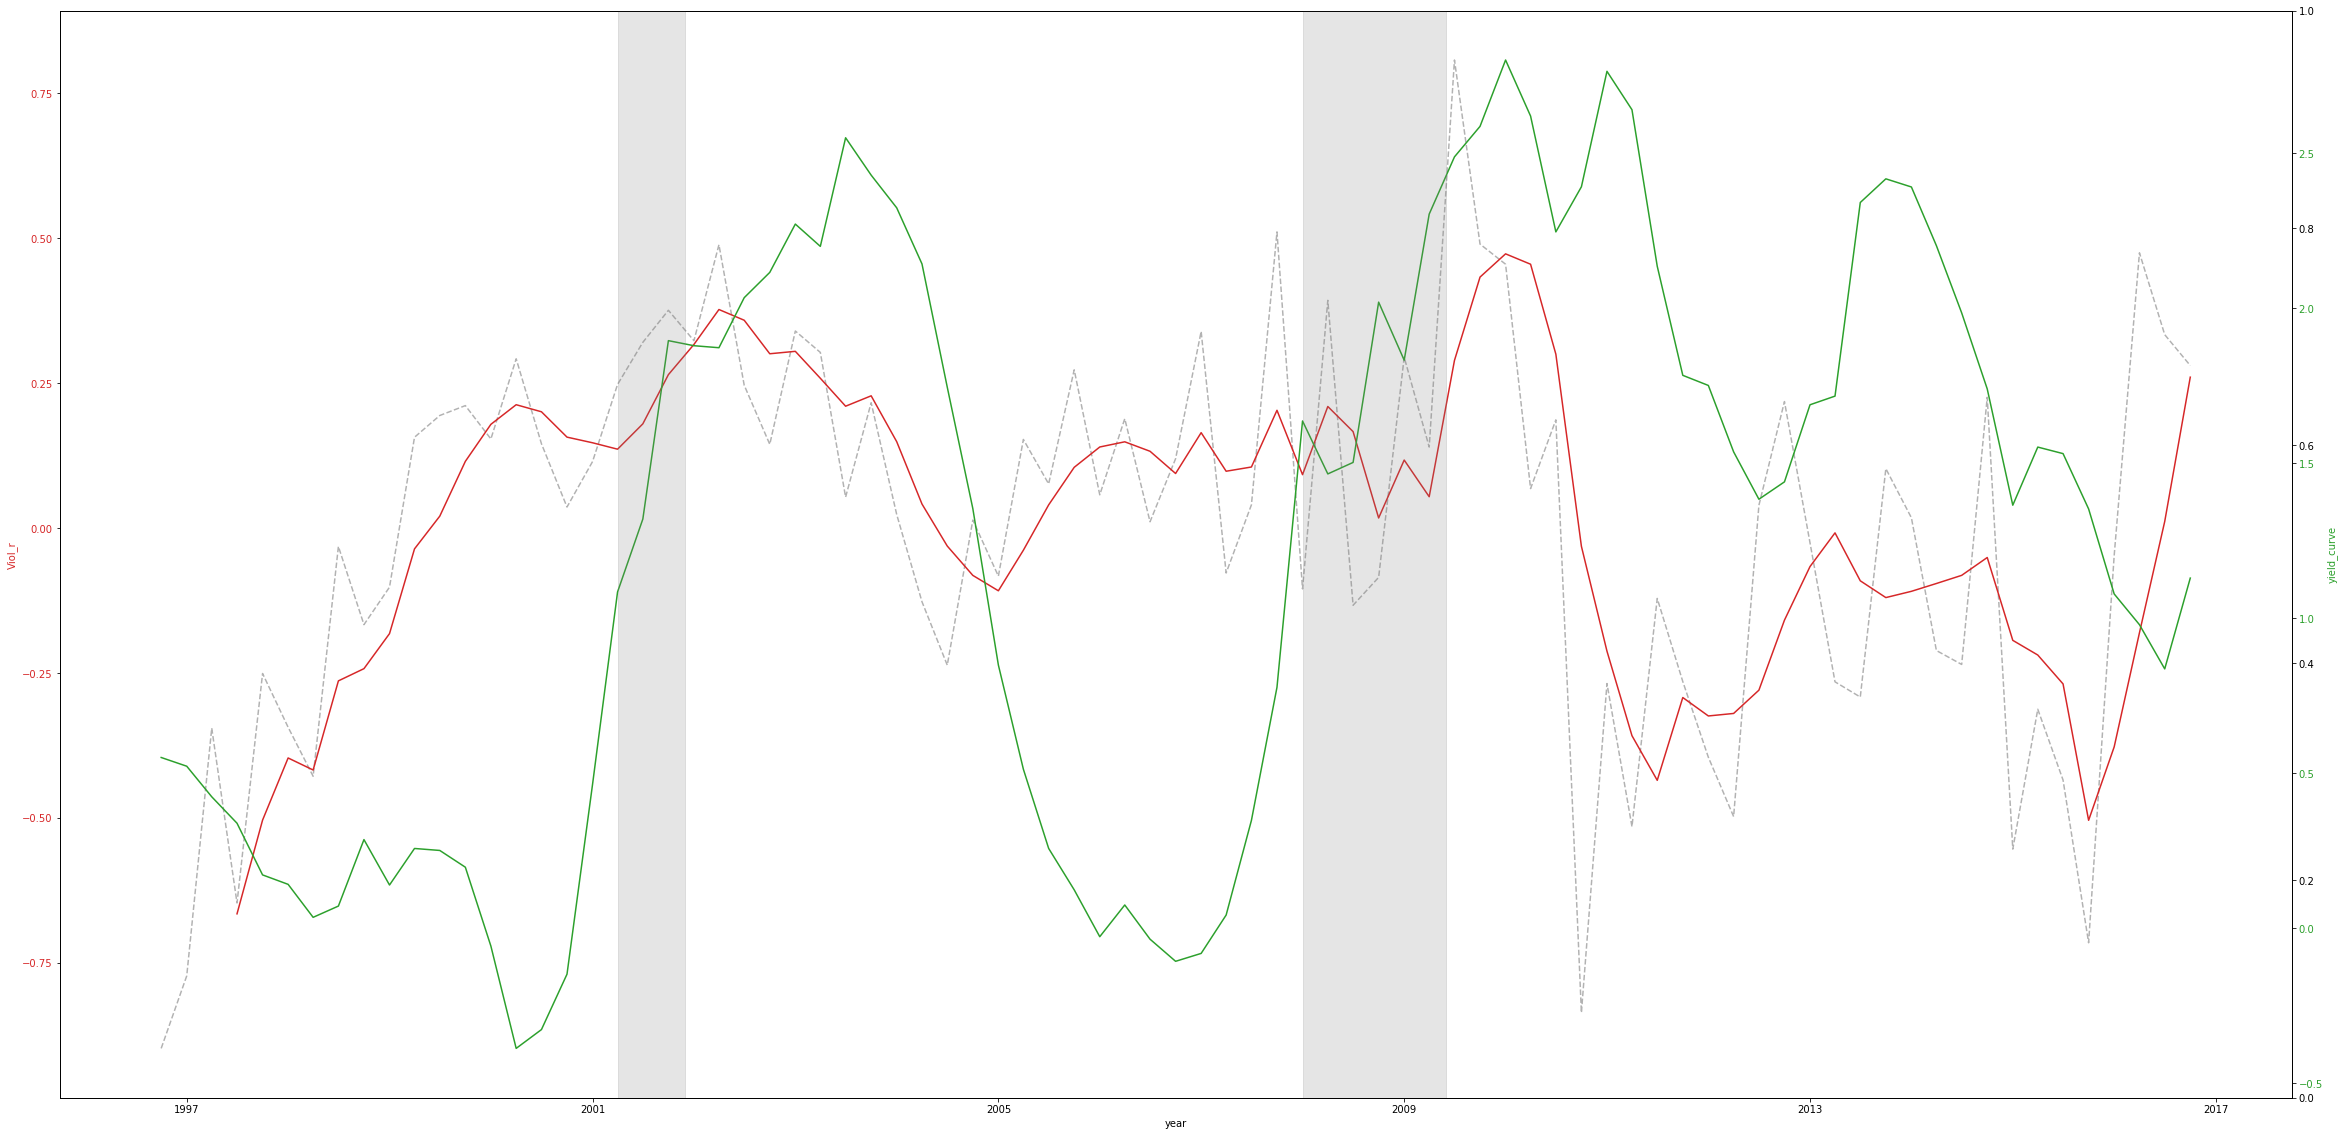

In [51]:
moving_avg = pd.rolling_mean(x['Viol_r'],4)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('Viol_r', color=color)
ax1.plot(x['Viol_r'], color='black',alpha=0.3,linestyle='dashed')
ax1.plot(moving_avg, color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax3.set_ylabel('yield_curve', color=color)  # we already handled the x-label with ax1
ax3.plot(x['yield_curve'], color=color)
ax3.tick_params(axis='y', labelcolor=color)

recs2k_bgn = pd.to_datetime('2001-04-01')
recs2k_end = pd.to_datetime('2001-12-01')

recs2k8_bgn = pd.to_datetime('2008-01-01')
recs2k8_end = pd.to_datetime('2009-06-01')

ax4 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax4.axvspan(recs2k_bgn, recs2k_end, color='grey', alpha=0.2)
ax4.axvspan(recs2k8_bgn, recs2k8_end,  color='grey', alpha=0.2)

plt.show()

In [52]:
df_new = df_new.dropna()

In [53]:
df_new.corr()

,Viol_r,yield_curve,Viol_r_1,Viol_r_2,Viol_r_3,Viol_r_4,Viol_r_5,Viol_r_6,Viol_r_7,Viol_r_8,...,yield_curve_1,yield_curve_2,yield_curve_3,yield_curve_4,yield_curve_5,yield_curve_6,yield_curve_7,yield_curve_8,yield_curve_9,yield_curve_10
Viol_r,1.000000,-0.149833,0.462149,0.379951,0.177866,0.069802,0.014672,0.036529,-0.072715,0.018448,...,-0.196622,-0.290592,-0.358035,-0.427482,-0.460793,-0.470447,-0.465052,-0.494247,-0.474164,-0.425404
yield_curve,-0.149833,1.000000,-0.063486,0.046686,0.113454,0.213537,0.249022,0.295200,0.321655,0.307818,...,0.950508,0.862454,0.749902,0.621159,0.495746,0.370806,0.250369,0.127780,0.013388,-0.091969
Viol_r_1,0.462149,-0.063486,1.000000,0.459373,0.372399,0.189157,0.108924,0.039439,0.064567,-0.043258,...,-0.135338,-0.180724,-0.273122,-0.340891,-0.414726,-0.450981,-0.463882,-0.457884,-0.493467,-0.477896
Viol_r_2,0.379951,0.046686,0.459373,1.000000,0.450025,0.386217,0.243527,0.142433,0.077069,0.105916,...,-0.045345,-0.114912,-0.159481,-0.252415,-0.325714,-0.402861,-0.442779,-0.454807,-0.456642,-0.497676
Viol_r_3,0.177866,0.113454,0.372399,0.450025,1.000000,0.459891,0.462669,0.287188,0.172438,0.125611,...,0.057397,-0.029389,-0.101730,-0.148828,-0.249206,-0.327611,-0.407889,-0.445299,-0.467348,-0.476184
Viol_r_4,0.069802,0.213537,0.189157,0.386217,0.459891,1.000000,0.486066,0.475913,0.319759,0.192936,...,0.138547,0.079391,-0.000232,-0.069874,-0.117837,-0.216429,-0.297932,-0.379792,-0.418714,-0.441641
Viol_r_5,0.014672,0.249022,0.108924,0.243527,0.462669,0.486066,1.000000,0.467587,0.477757,0.286923,...,0.232261,0.142279,0.090983,0.014257,-0.048537,-0.091580,-0.195414,-0.287782,-0.360943,-0.393475
Viol_r_6,0.036529,0.295200,0.039439,0.142433,0.287188,0.475913,0.467587,1.000000,0.465129,0.463231,...,0.261201,0.236208,0.151893,0.103503,0.031941,-0.027175,-0.072460,-0.182598,-0.268922,-0.338261
Viol_r_7,-0.072715,0.321655,0.064567,0.077069,0.172438,0.319759,0.477757,0.465129,1.000000,0.468452,...,0.322789,0.280666,0.264785,0.185960,0.140162,0.072739,0.010022,-0.040180,-0.144441,-0.225968
Viol_r_8,0.018448,0.307818,-0.043258,0.105916,0.125611,0.192936,0.286923,0.463231,0.468452,1.000000,...,0.339586,0.330558,0.295186,0.282666,0.210018,0.168776,0.098636,0.028328,-0.013469,-0.112854


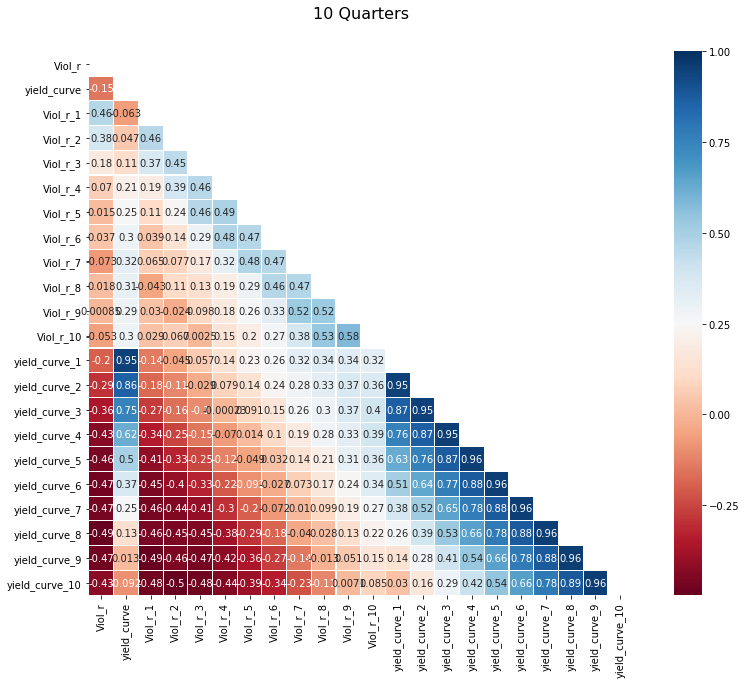

In [54]:
colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))
plt.title(u'10 Quarters', y=1.05, size=16)

mask = np.zeros_like(df_new.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(df_new.corr(), mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [55]:
x['Viol_r'] = x['Viol_r'].shift(6)
x.head()

,Viol_r,yield_curve
Quarter,,
1996-10-01,NaN,0.550484
1997-01-01,NaN,0.522333
1997-04-01,NaN,0.423750
1997-07-01,NaN,0.338438
1997-10-01,NaN,0.171774


In [56]:
x = x.dropna()
x.head()

,Viol_r,yield_curve
Quarter,,
1998-04-01,-0.897850,0.034921
1998-07-01,-0.772725,0.071250
1998-10-01,-0.345263,0.285645
1999-01-01,-0.646939,0.139180
1999-04-01,-0.251018,0.257031


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=False).mean()
  if __name__ == '__main__':


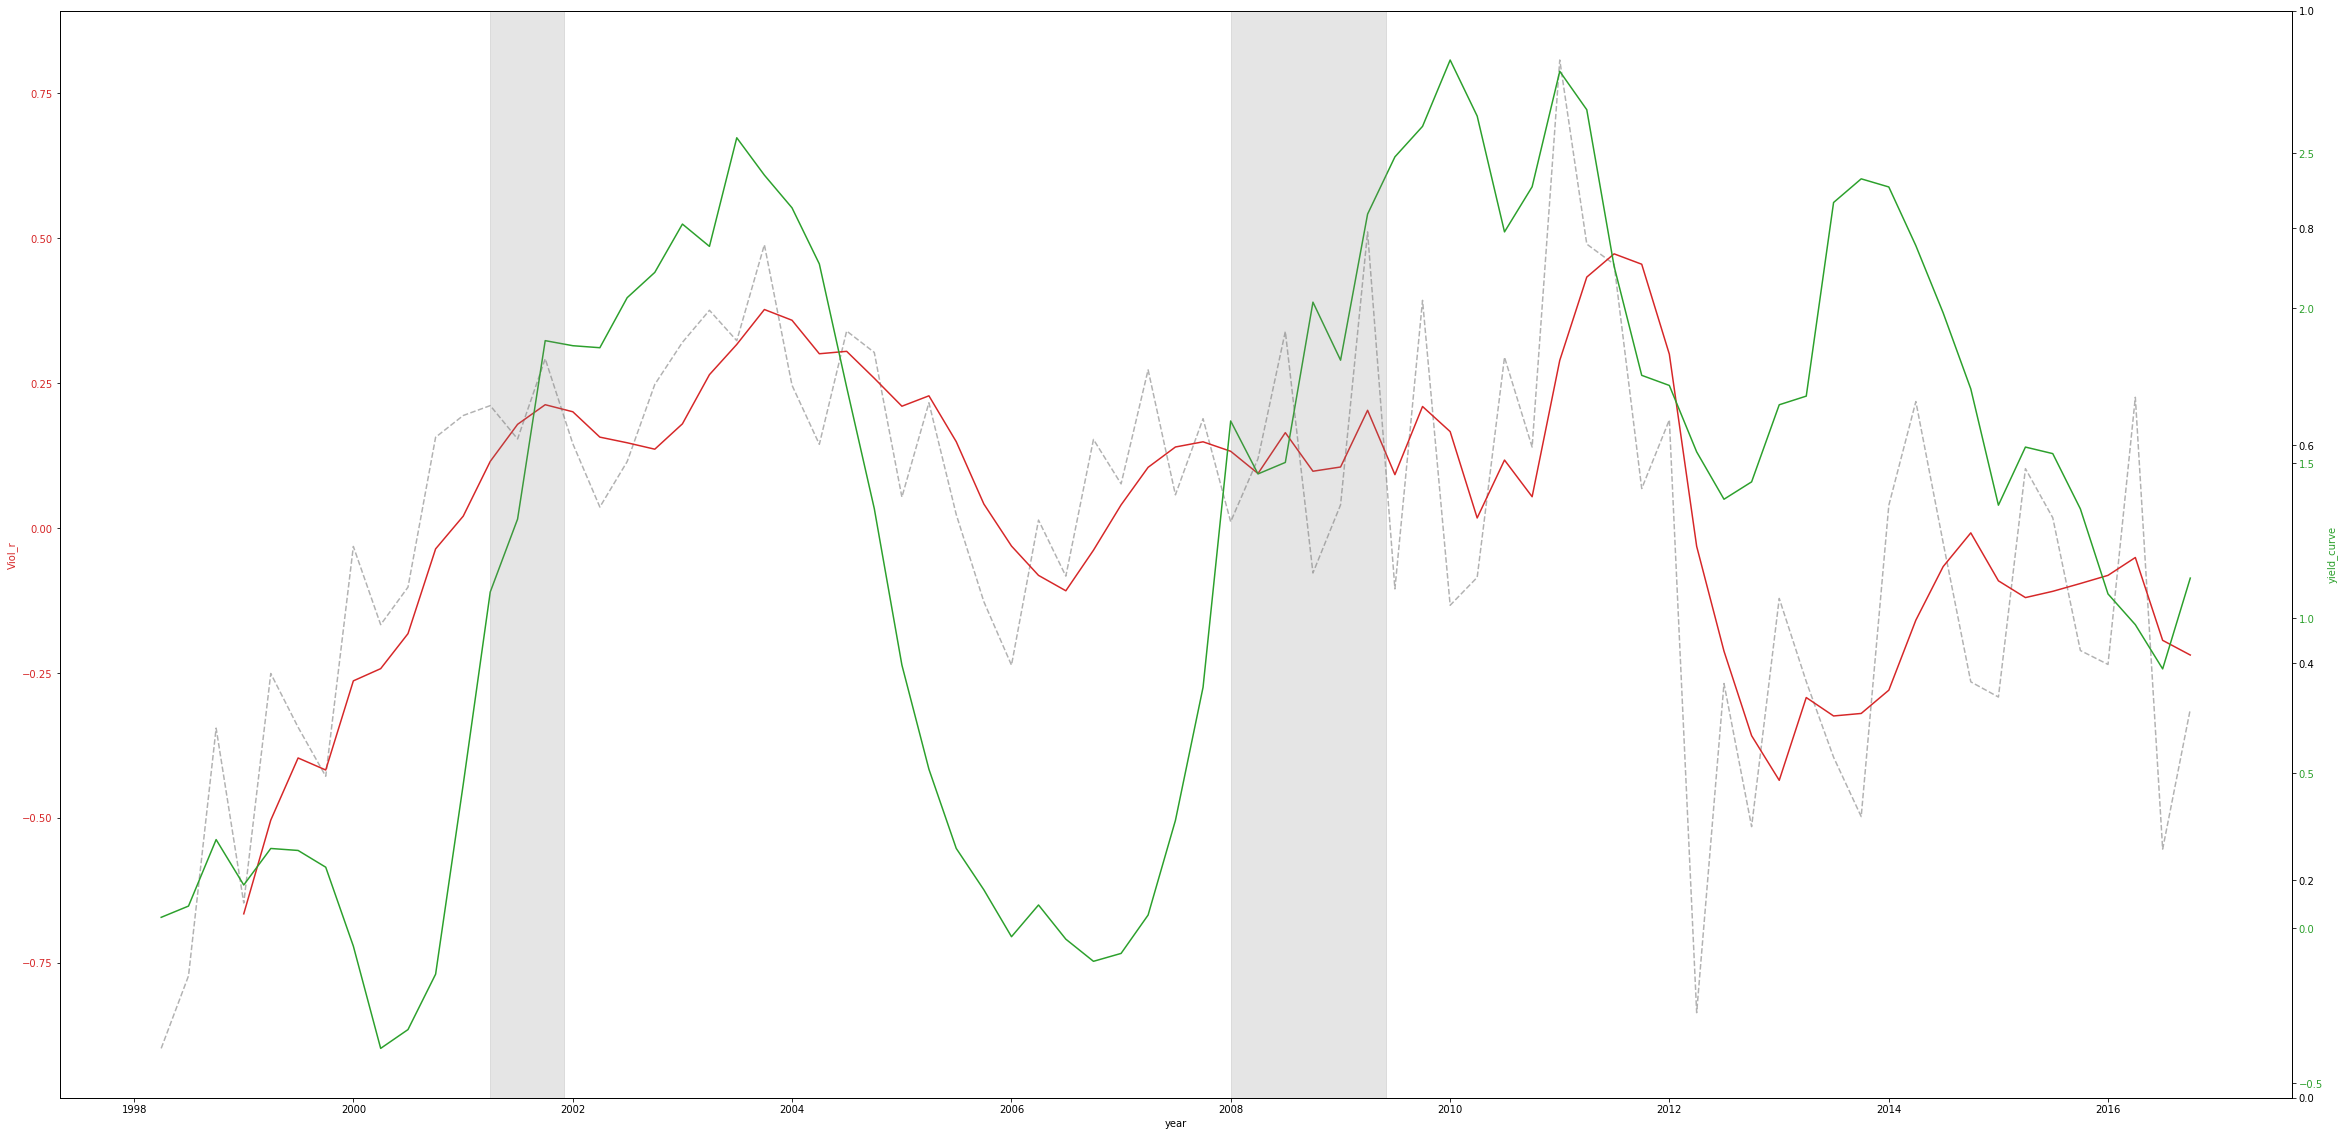

In [57]:
moving_avg = pd.rolling_mean(x['Viol_r'],4)
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('Viol_r', color=color)
ax1.plot(x['Viol_r'], color='black',alpha=0.3,linestyle='dashed')
ax1.plot(moving_avg, color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax3.set_ylabel('yield_curve', color=color)  # we already handled the x-label with ax1
ax3.plot(x['yield_curve'], color=color)
ax3.tick_params(axis='y', labelcolor=color)

recs2k_bgn = pd.to_datetime('2001-04-01')
recs2k_end = pd.to_datetime('2001-12-01')

recs2k8_bgn = pd.to_datetime('2008-01-01')
recs2k8_end = pd.to_datetime('2009-06-01')

ax4 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax4.axvspan(recs2k_bgn, recs2k_end, color='grey', alpha=0.2)
ax4.axvspan(recs2k8_bgn, recs2k8_end,  color='grey', alpha=0.2)

plt.show()

In [58]:
model1=sm.OLS(endog=x['yield_curve'],exog=x['Viol_r'])
results1=model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:            yield_curve   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     3.930
Date:                Sat, 18 Aug 2018   Prob (F-statistic):             0.0511
Time:                        18:13:20   Log-Likelihood:                -141.09
No. Observations:                  75   AIC:                             284.2
Df Residuals:                      74   BIC:                             286.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Viol_r         1.1247      0.567      1.982      0.0

In [59]:
np.corrcoef(x['yield_curve'],x['Viol_r'])

array([[ 1.        ,  0.39485702],
       [ 0.39485702,  1.        ]])

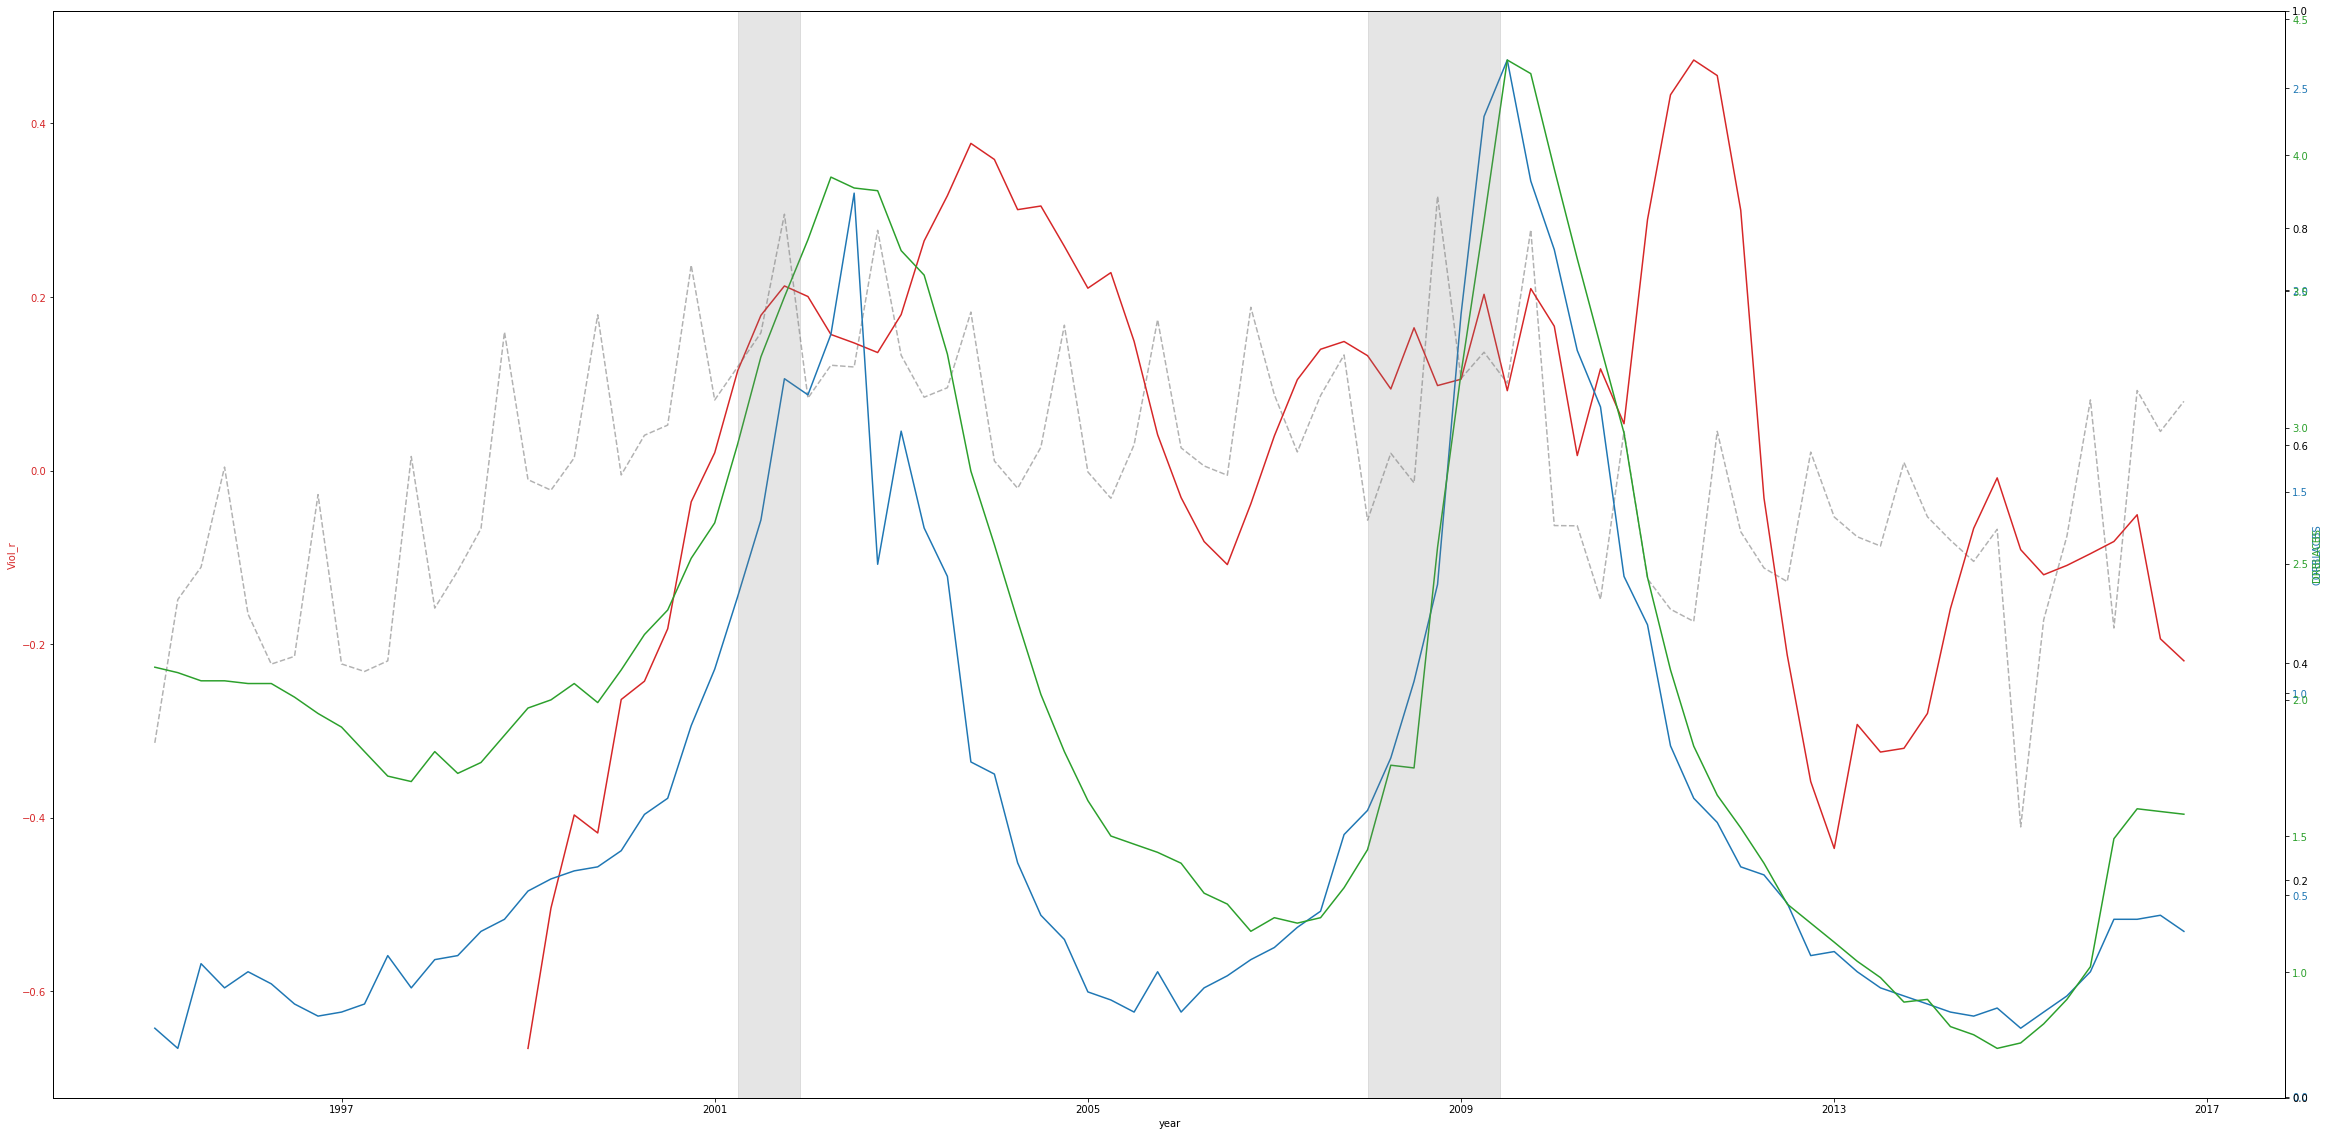

In [60]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('Viol_r', color=color)
ax1.plot(ts_1, color='black',alpha=0.3,linestyle='dashed')
ax1.plot(moving_avg, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('CORBLACBS', color=color)  # we already handled the x-label with ax1
ax2.plot(ts_2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax3.set_ylabel('DRBLACBS', color=color)  # we already handled the x-label with ax1
ax3.plot(ts_3, color=color)
ax3.tick_params(axis='y', labelcolor=color)

recs2k_bgn = pd.to_datetime('2001-04-01')
recs2k_end = pd.to_datetime('2001-12-01')

recs2k8_bgn = pd.to_datetime('2008-01-01')
recs2k8_end = pd.to_datetime('2009-06-01')

ax4 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax4.axvspan(recs2k_bgn, recs2k_end, color='grey', alpha=0.2)
ax4.axvspan(recs2k8_bgn, recs2k8_end,  color='grey', alpha=0.2)

plt.show()

In [61]:
import statsmodels.api as sm
print(sm.tsa.stattools.adfuller(data['DRBLACBS']))
print(sm.tsa.stattools.adfuller(data['CORBLACBS']))
print(sm.tsa.stattools.adfuller(data['Viol_r']))

(-3.6497226645239889, 0.0048785747666562906, 2, 85, {'5%': -2.8961947486260944, '10%': -2.5852576124567475, '1%': -3.5097356063504983}, -67.117683694942883)
(-3.1314022412533018, 0.024314888343986707, 3, 84, {'5%': -2.8966159448223734, '10%': -2.5854823866213152, '1%': -3.510711795769895}, -38.472902586185313)
(-1.9783334502748182, 0.29615317371436112, 8, 79, {'5%': -2.8988857034839031, '10%': -2.5866935058484217, '1%': -3.5159766913976376}, -174.61020655434254)


In [62]:
model1=sm.OLS(endog=data['CORBLACBS'],exog=data['Viol_r'])
results1=model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:              CORBLACBS   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     8.490
Date:                Sat, 18 Aug 2018   Prob (F-statistic):            0.00454
Time:                        18:13:22   Log-Likelihood:                -116.23
No. Observations:                  88   AIC:                             234.5
Df Residuals:                      87   BIC:                             236.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Viol_r         2.0520      0.704      2.914      0.0

In [63]:
diffS = data['Viol_r'].diff()
diffM = data['CORBLACBS'].diff()
model2=sm.OLS(endog=diffM.dropna(),exog=diffS.dropna())
results2=model1.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:              CORBLACBS   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     8.490
Date:                Sat, 18 Aug 2018   Prob (F-statistic):            0.00454
Time:                        18:13:22   Log-Likelihood:                -116.23
No. Observations:                  88   AIC:                             234.5
Df Residuals:                      87   BIC:                             236.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Viol_r         2.0520      0.704      2.914      0.0

In [64]:
model1=sm.OLS(endog=data_3['CORBLACBS'],exog=data_3['Viol_r'])
results1=model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:              CORBLACBS   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.637
Date:                Sat, 18 Aug 2018   Prob (F-statistic):              0.204
Time:                        18:13:22   Log-Likelihood:                -115.87
No. Observations:                  84   AIC:                             233.7
Df Residuals:                      83   BIC:                             236.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Viol_r         0.4012      0.314      1.279      0.2

In [65]:

body = client_e2bea2140e04443794485cdd2dcaf7b2.get_object(Bucket='staranalysis-donotdelete-pr-8ev5vemwyzco1a',Key='Year Compare.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()

,Year,CORBLACBS,DRBLACBS,Viol
0,1995,0.2225,2.0900,-0.105853
1,1996,0.2550,2.0200,-0.166890
2,1997,0.2650,1.7825,-0.162973
3,1998,0.3850,1.7950,-0.054267
4,1999,0.5450,2.0050,0.024773


In [66]:
data_2 = df_data_2.set_index('Year')
data_2.head()

,CORBLACBS,DRBLACBS,Viol
Year,,,
1995,0.2225,2.0900,-0.105853
1996,0.2550,2.0200,-0.166890
1997,0.2650,1.7825,-0.162973
1998,0.3850,1.7950,-0.054267
1999,0.5450,2.0050,0.024773


In [67]:
new_list = []
for item in df_data_2['Year']:
    new_list.append(float(item))
new_list

[1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0]

In [68]:
data_new = data_2.reindex(new_list)
data_new.head()

,CORBLACBS,DRBLACBS,Viol
Year,,,
1995.0,0.2225,2.0900,-0.105853
1996.0,0.2550,2.0200,-0.166890
1997.0,0.2650,1.7825,-0.162973
1998.0,0.3850,1.7950,-0.054267
1999.0,0.5450,2.0050,0.024773


In [69]:
data_new = data_new.reset_index()
data_new.head()

,Year,CORBLACBS,DRBLACBS,Viol
0,1995.0,0.2225,2.0900,-0.105853
1,1996.0,0.2550,2.0200,-0.166890
2,1997.0,0.2650,1.7825,-0.162973
3,1998.0,0.3850,1.7950,-0.054267
4,1999.0,0.5450,2.0050,0.024773


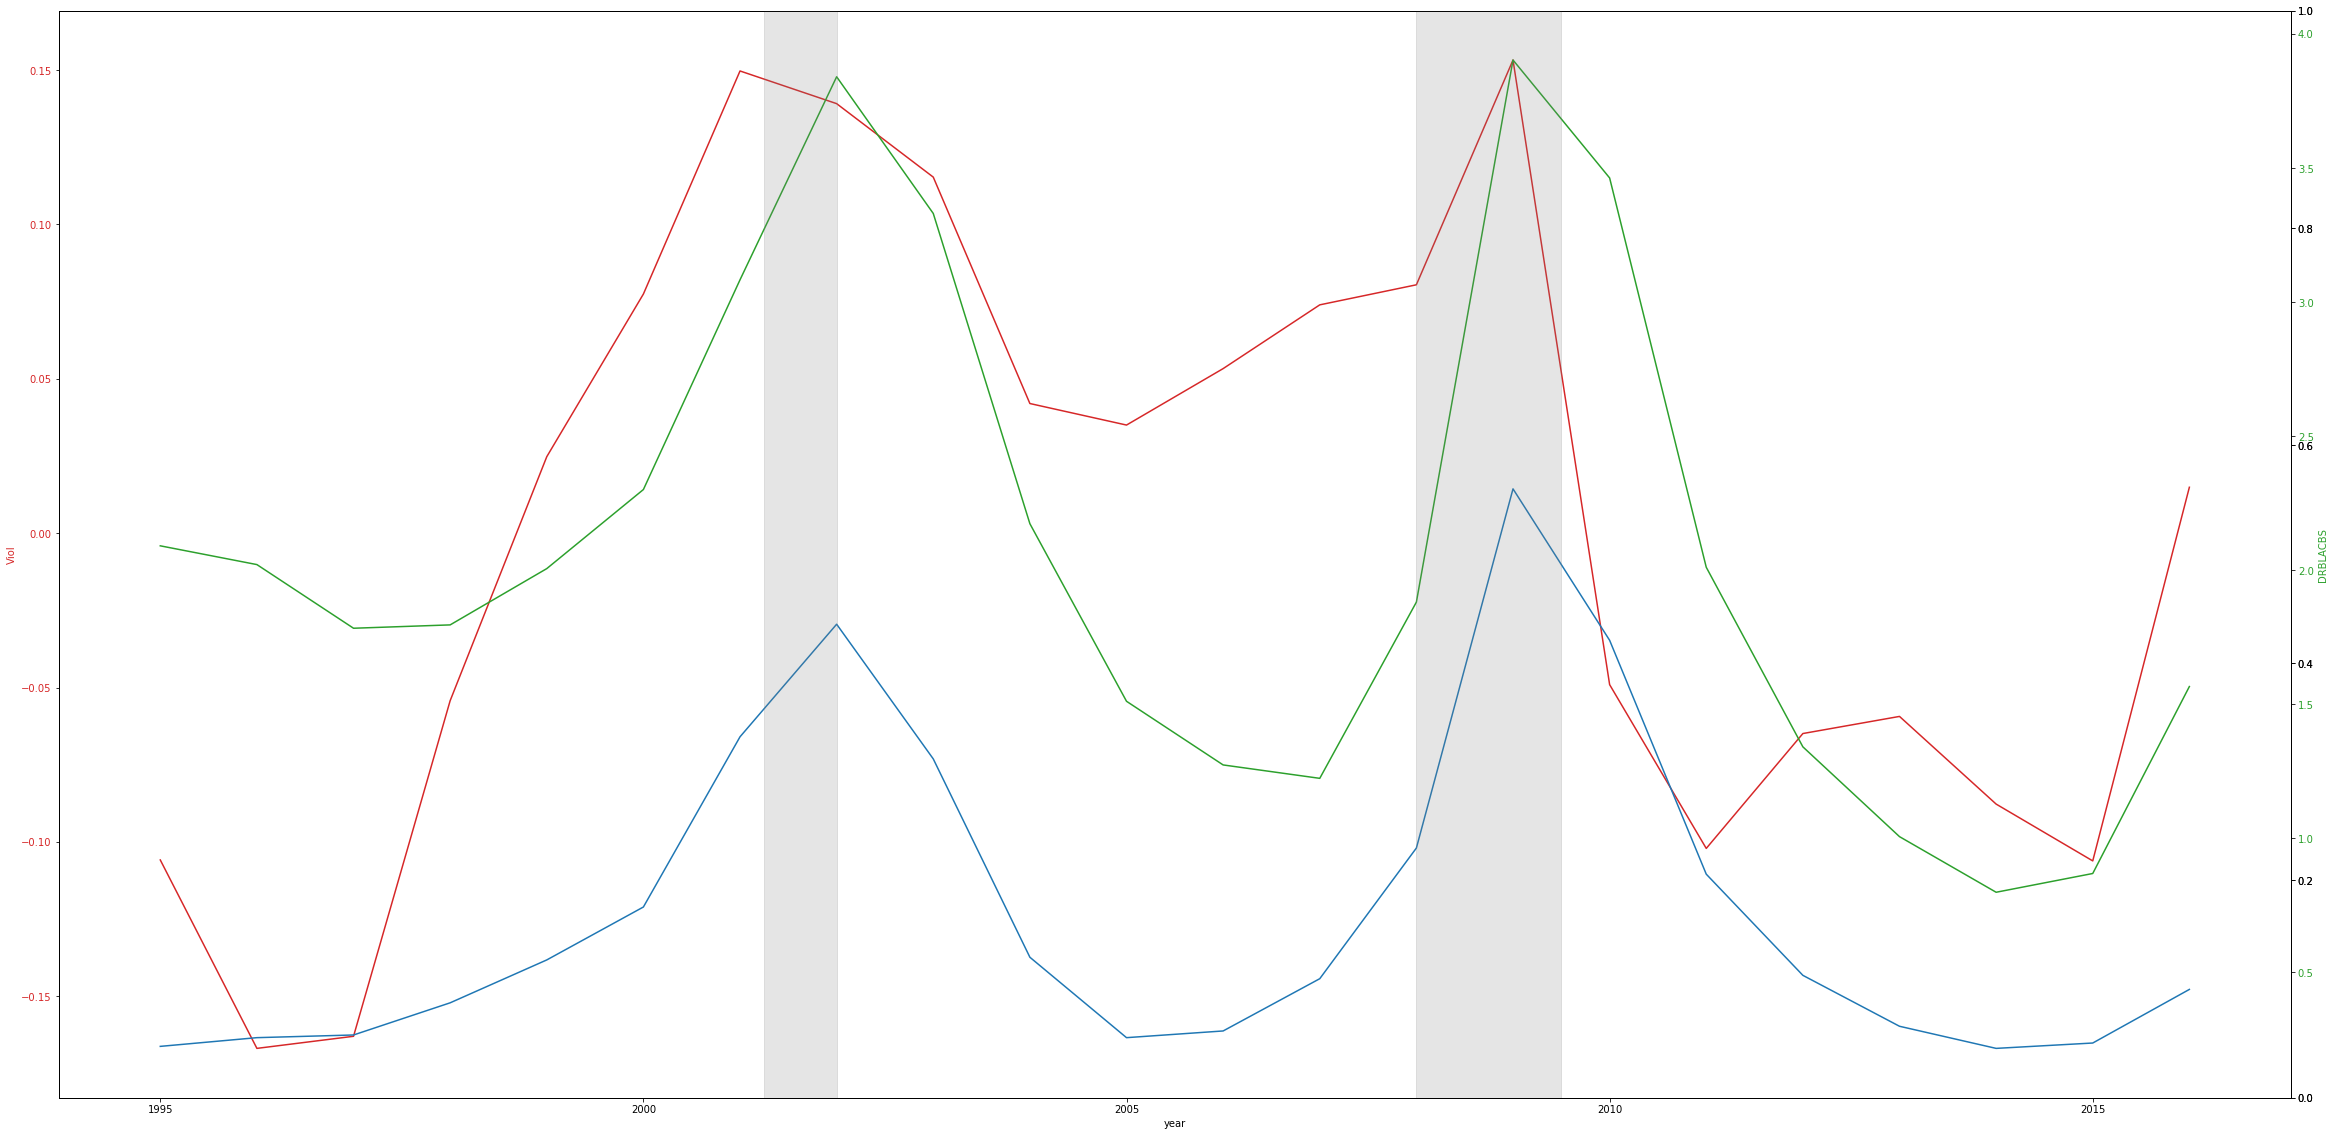

In [70]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('Viol', color=color)
ax1.plot(data_new['Year'],data_new['Viol'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('CORBLACBS', color=color)  # we already handled the x-label with ax1
ax2.plot(data_new['Year'],data_new['CORBLACBS'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('DRBLACBS', color=color)  # we already handled the x-label with ax1
ax2.plot(data_new['Year'],data_new['DRBLACBS'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

recs2k_bgn = 2001.25
recs2k_end = 2002

recs2k8_bgn = 2008
recs2k8_end = 2009.5

ax4 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax4.axvspan(recs2k_bgn, recs2k_end, color='grey', alpha=0.2)
ax4.axvspan(recs2k8_bgn, recs2k8_end,  color='grey', alpha=0.2)

plt.show()